In [1]:
import warnings
import itertools 

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from pylab import rcParams

import statsmodels.api as sm
from statsmodels.graphics import tsaplots
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX

warnings.filterwarnings('ignore')

In [2]:
a5m = pd.read_csv('https://raw.githubusercontent.com/lponcec94/PolyWorks/main/semana_4/data/A5M.csv', names=['bits'])
a1h = pd.read_csv('https://raw.githubusercontent.com/lponcec94/PolyWorks/main/semana_4/data/A1H.csv', names=['bits'])
a1d = pd.read_csv('https://raw.githubusercontent.com/lponcec94/PolyWorks/main/semana_4/data/A1D.csv', names=['bits'])

In [3]:
a5m.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14772 entries, 0 to 14771
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   bits    14772 non-null  int64
dtypes: int64(1)
memory usage: 115.5 KB


In [4]:
a1d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   bits    51 non-null     int64
dtypes: int64(1)
memory usage: 536.0 bytes


In [5]:
a1h.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1231 entries, 0 to 1230
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   bits    1231 non-null   int64
dtypes: int64(1)
memory usage: 9.7 KB


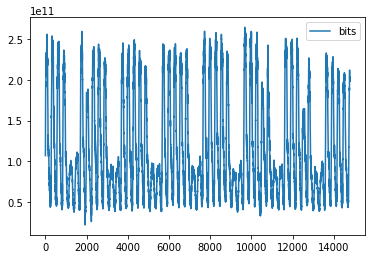

In [6]:
a5m.plot()


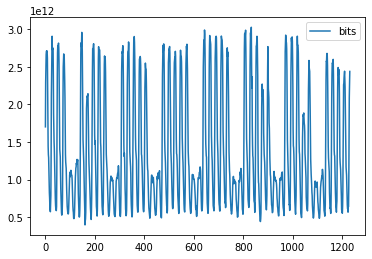

In [54]:
a1h.plot()

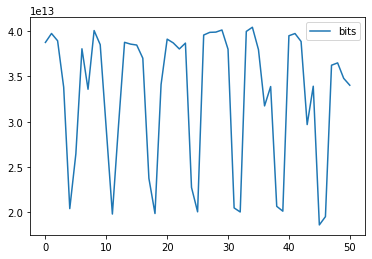

In [8]:
a1d.plot()

In [253]:
#para pd.date_range el formato de calendario es M/D/Y
date_5m=pd.date_range(start='06/07/2005 06:57:00' ,end='07/29/2005 11:17:00'
  ,freq='5min')

date_1h=pd.date_range(start='06/07/2005 06:57:00' ,end='07/29/2005 11:17:00'
  ,freq='H')

date_1d=pd.date_range(start='06/07/2005 06:57:00' ,end='07/29/2005 11:17:00'
  ,freq='D')

In [254]:
type(date_5m)

pandas.core.indexes.datetimes.DatetimeIndex

In [255]:
data_ser_5m=pd.Series(date_5m,name='date')
data_ser_1h=pd.Series(date_1h,name='date')
data_ser_1d=pd.Series(date_1d,name='date')

type(data_ser_5m)

pandas.core.series.Series

In [256]:
df_a5m=pd.concat([a5m,data_ser_5m],axis=1)
df_a1h=pd.concat([a1h,data_ser_1h],axis=1)
df_a1d=pd.concat([a1d,data_ser_1d],axis=1)

df_a5m.dropna(inplace=True)
df_a1h.dropna(inplace=True)
df_a1d.dropna(inplace=True)

In [257]:
df_a5m.head()

,bits,date
0,1.068684e+11,2005-06-07 06:57:00
1,1.113065e+11,2005-06-07 07:02:00
2,1.163241e+11,2005-06-07 07:07:00
3,1.162906e+11,2005-06-07 07:12:00
4,1.374763e+11,2005-06-07 07:17:00


In [260]:
df_a5m.set_index('date',inplace=True, drop=True)
df_a1h.set_index('date',inplace=True, drop=True)
df_a1d.set_index('date',inplace=True, drop=True)

df_a5m.head()

,bits
date,
2005-06-07 06:57:00,1.068684e+11
2005-06-07 07:02:00,1.113065e+11
2005-06-07 07:07:00,1.163241e+11
2005-06-07 07:12:00,1.162906e+11
2005-06-07 07:17:00,1.374763e+11


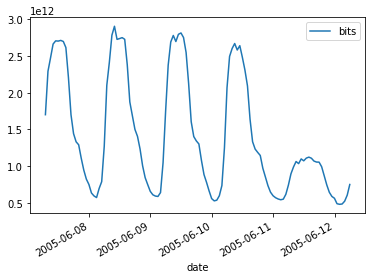

In [65]:
df_a1h.iloc[:120].plot()

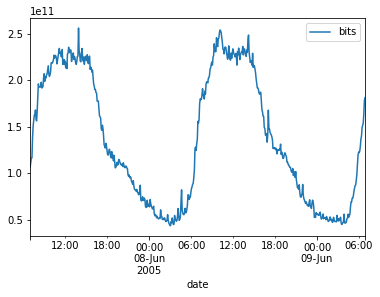

In [18]:
df_a5m.iloc[:576].plot()

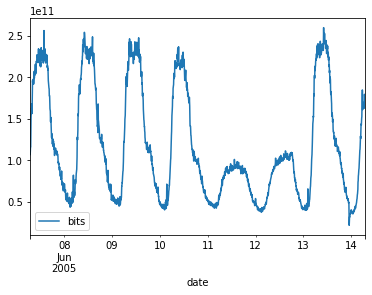

In [19]:
df_a5m.iloc[:2016].plot()

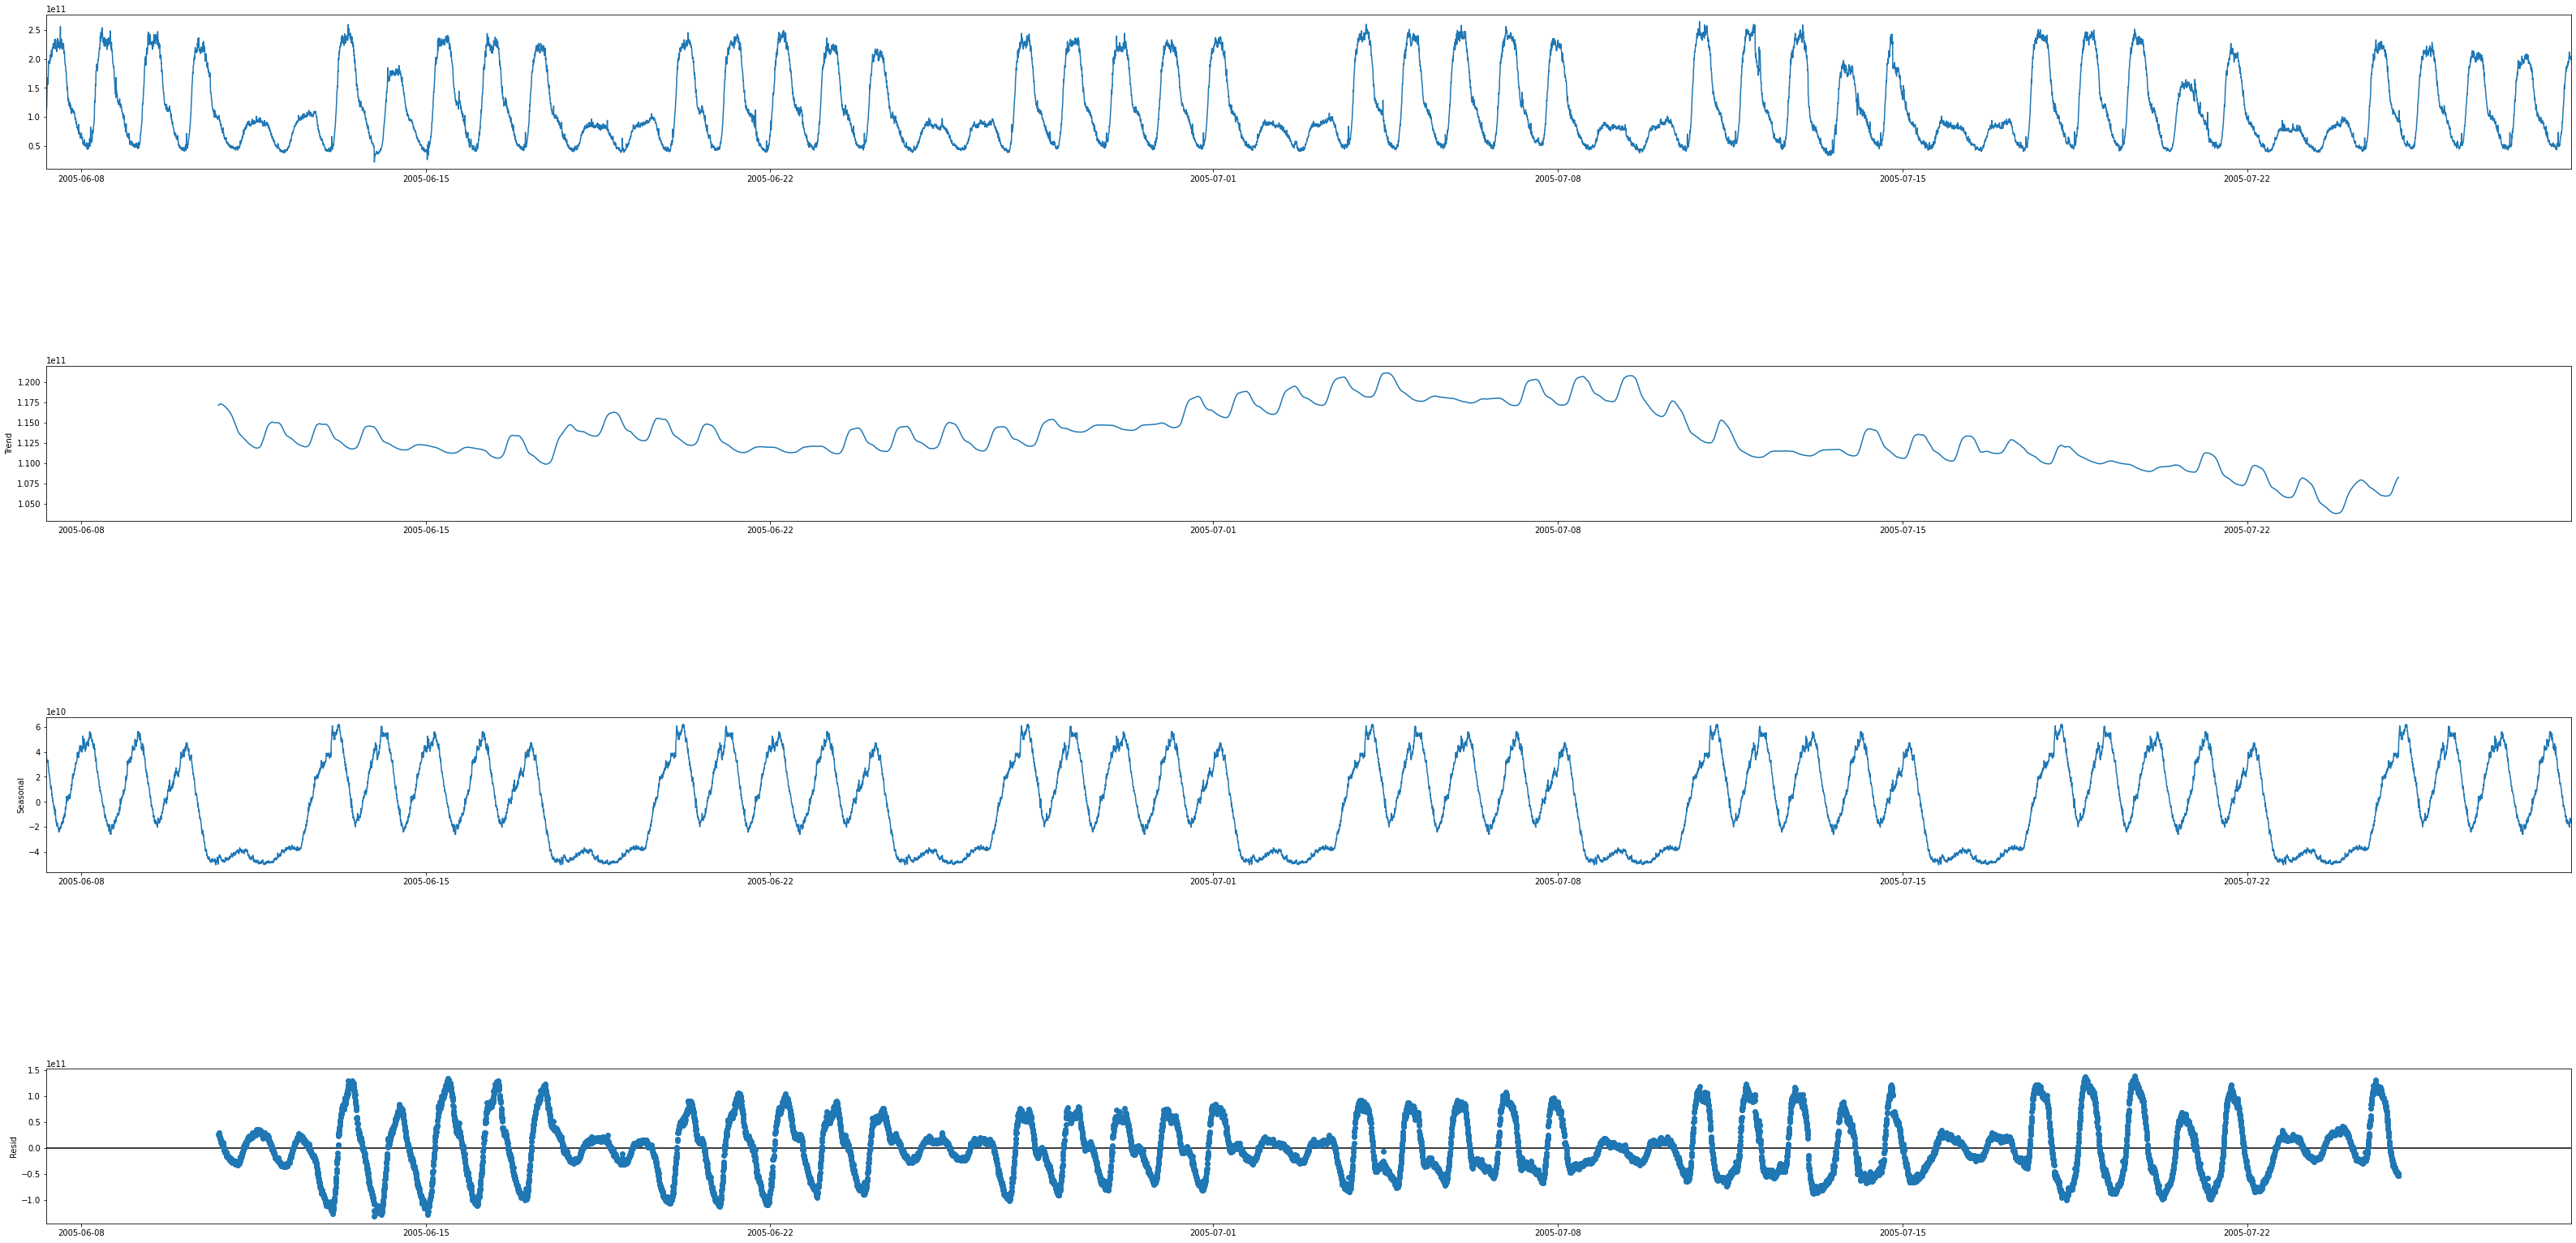

In [70]:
#descomposición estacional
#o es freq o es period
descomposition=sm.tsa.seasonal_decompose(df_a5m,freq=(7*24*60//5) )

fig=descomposition.plot()
fig.set_figheight(25)
fig.set_figwidth(50)

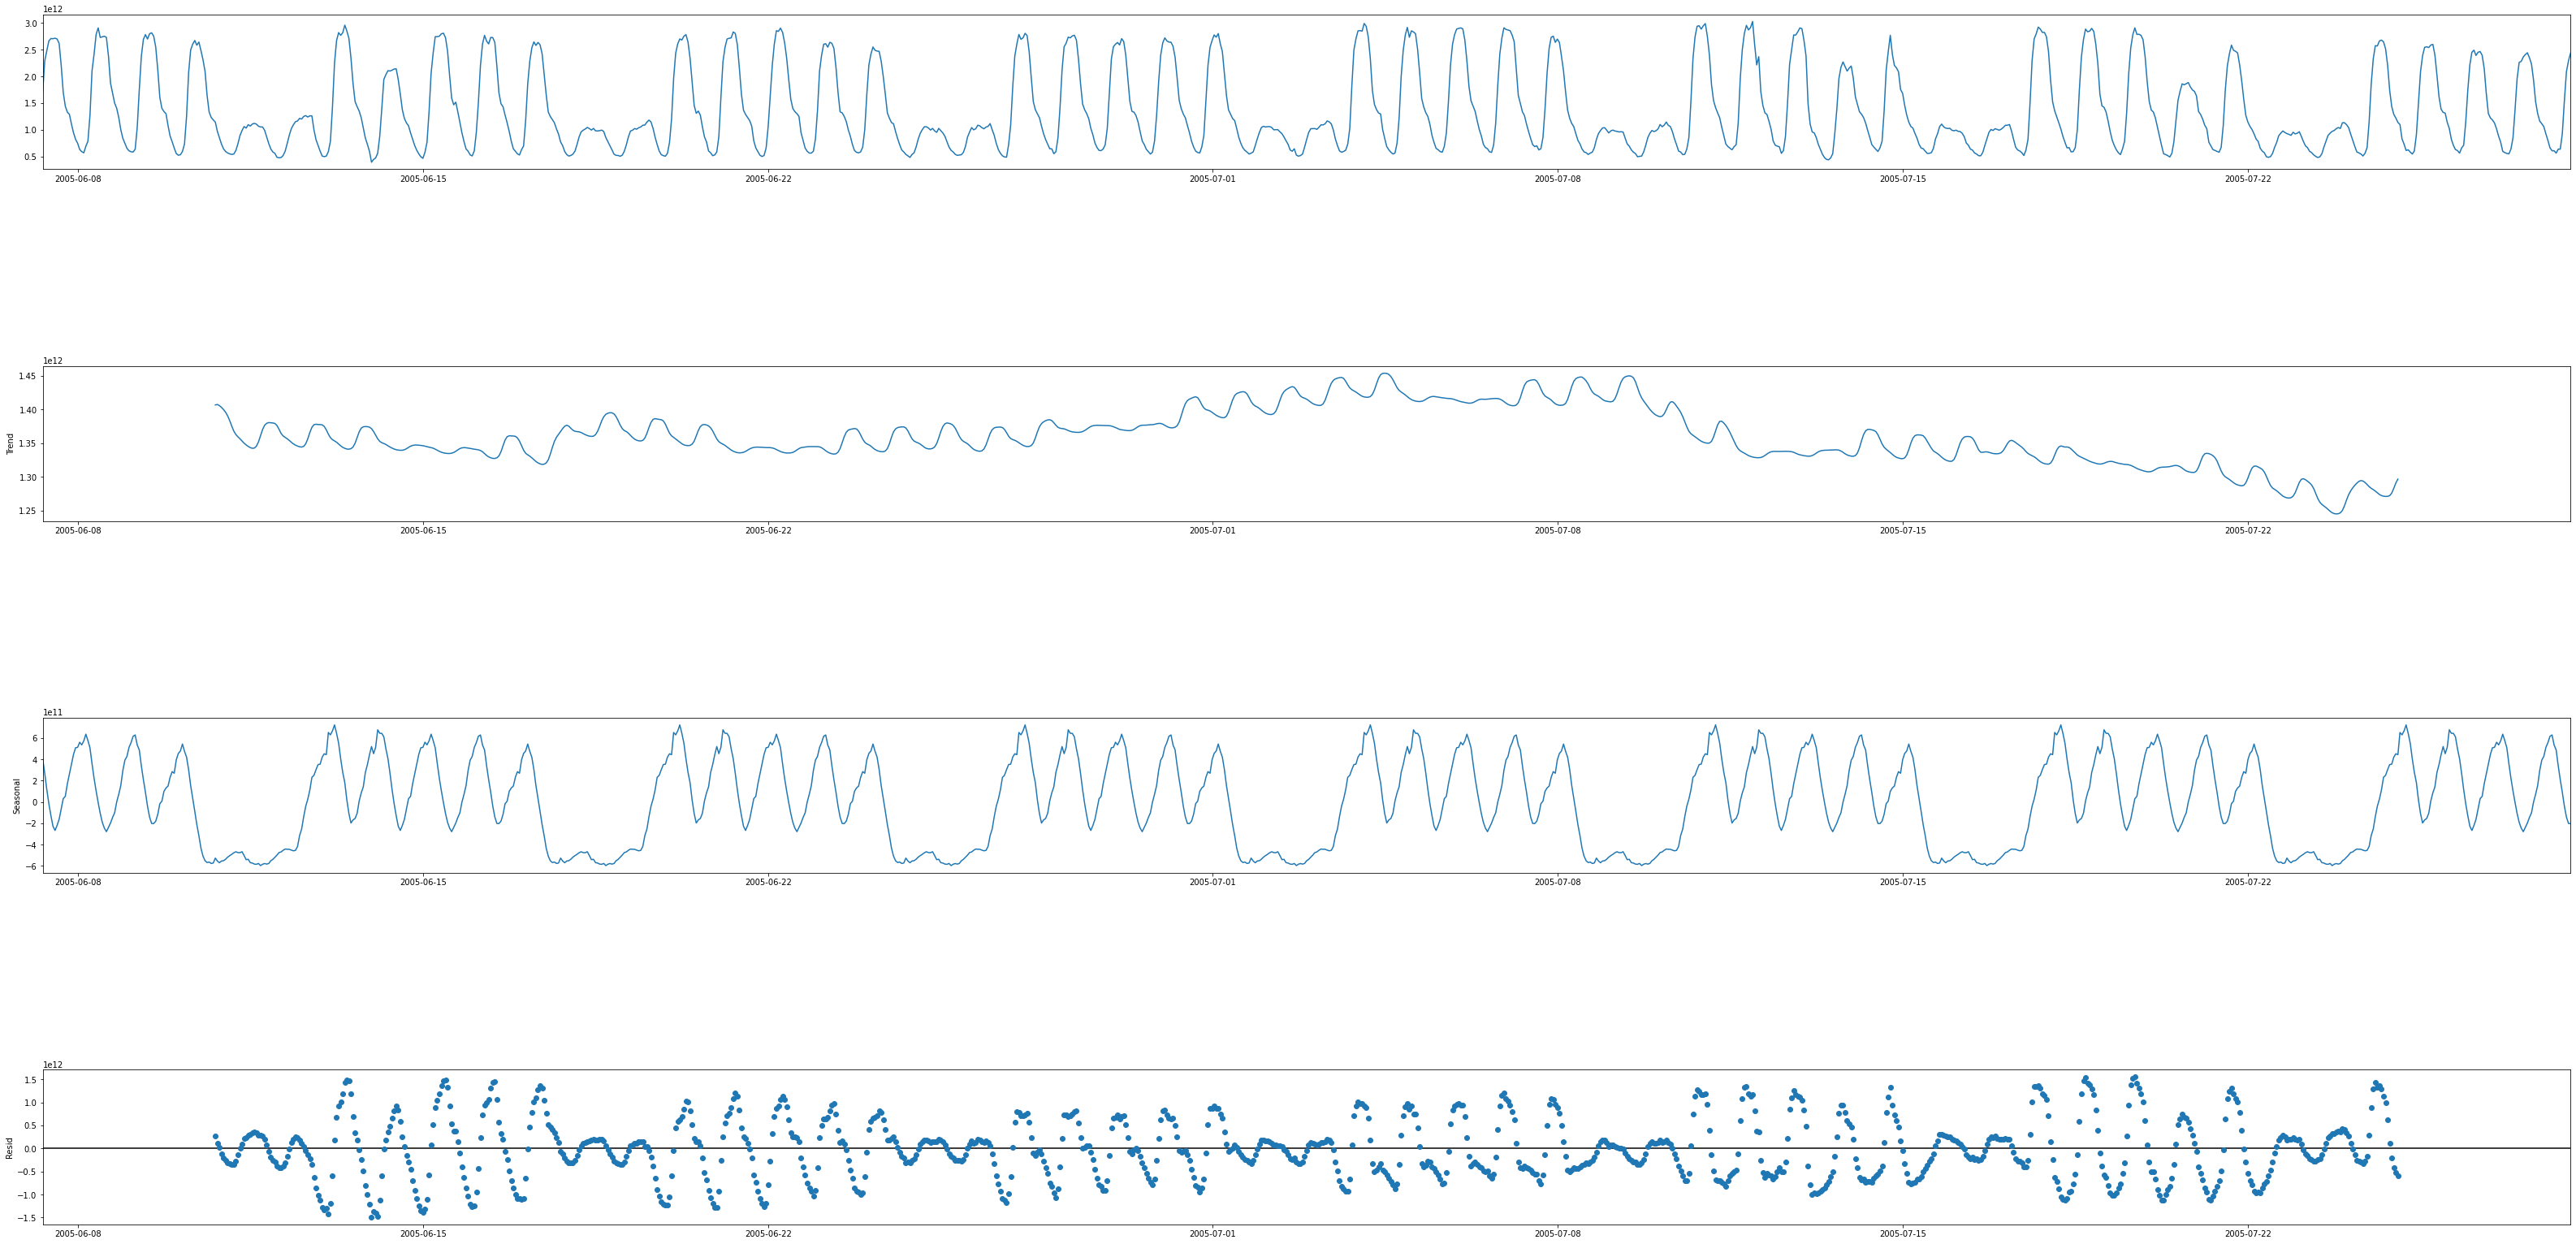

In [69]:
descomposition=sm.tsa.seasonal_decompose(df_a1h,freq=(7*24) )

fig=descomposition.plot()
fig.set_figheight(25)
fig.set_figwidth(50)

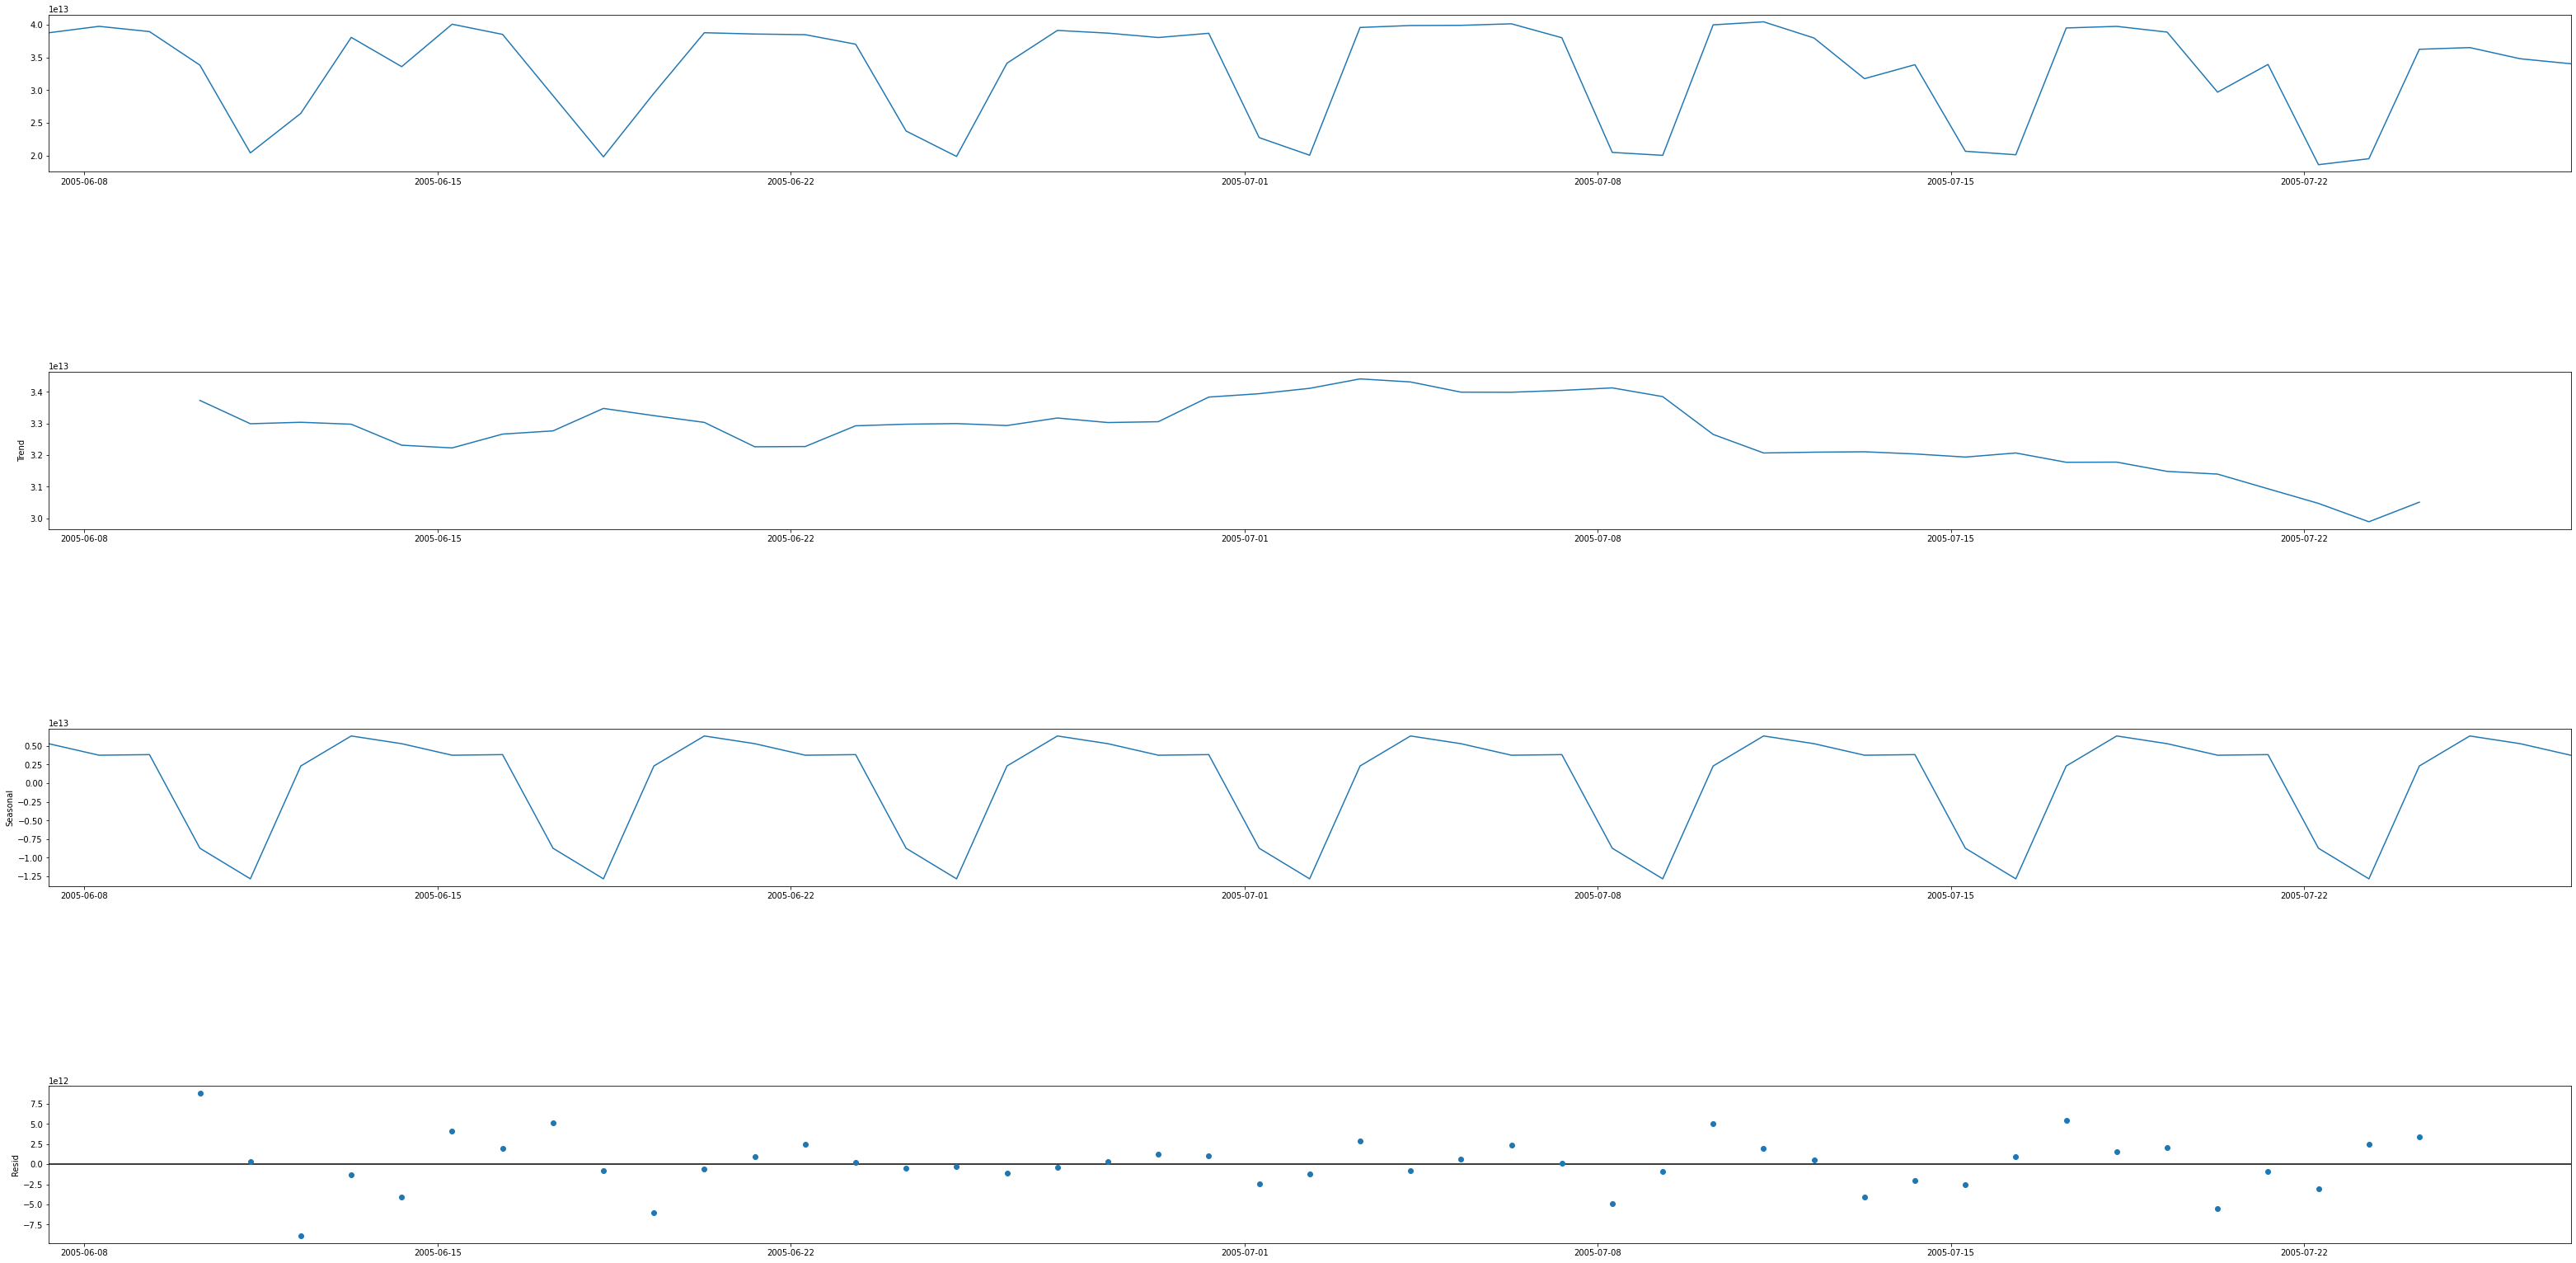

In [68]:
descomposition=sm.tsa.seasonal_decompose(df_a1d,freq=(7) )

fig=descomposition.plot()
fig.set_figheight(25)
fig.set_figwidth(50)

(0.0, 0.5)

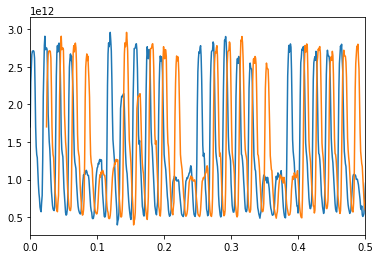

In [132]:
x=np.linspace(0,1,len(a1h))
l=30
plt.plot(x,a1h)
plt.plot(x[l:],a1h[:-1*l])

plt.xlim(0,0.5)

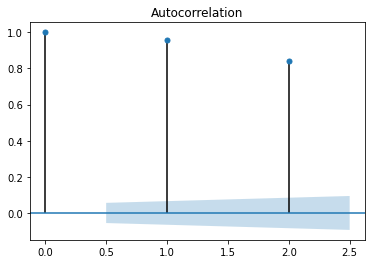

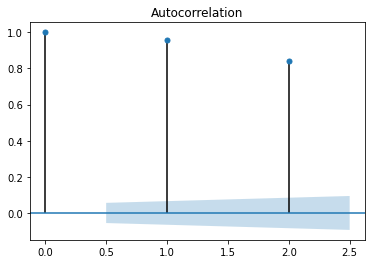

In [122]:
tsaplots.plot_acf(df_a1h,lags=2)

El modelo ARIMA (Auto Regressive Integrated Moving Average) sirve para ajustar y predecir una serie de tiempo. Se basa en la regresión lineal.

Suponemos que la serie de tiempo es estacionaria

In [218]:
p=d=q=range(0,3)
p,d,q

# m e interesa hacer todas las combinaciones de los parámetros pdq

(range(0, 3), range(0, 3), range(0, 3))

In [219]:
pdq=list(itertools.product(p,d,q))
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 2, 0),
 (0, 2, 1),
 (0, 2, 2),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 2),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 2, 0),
 (1, 2, 1),
 (1, 2, 2),
 (2, 0, 0),
 (2, 0, 1),
 (2, 0, 2),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 2, 0),
 (2, 2, 1),
 (2, 2, 2)]

In [240]:
#Akaike information criterion es similar a 1/r^2

model=list()
aic=list()

for param in pdq:
  mod=SARIMAX(df_a5m,order=param,enforce_stationarity=False)
  results=mod.fit()
  model.append(param)
  aic.append(results.aic)
  print(param,'  ',results.aic)

(0, 0, 0)    798249.6757264652
(0, 0, 1)    787282.9209187378
(0, 0, 2)    784591.7245630196
(0, 1, 0)    696982.1234432589
(0, 1, 1)    696930.1556071895
(0, 1, 2)    696885.025832181
(0, 2, 0)    707478.5588706338
(0, 2, 1)    697132.7013608941
(0, 2, 2)    696413.785912143
(1, 0, 0)    697028.2538984545
(1, 0, 1)    696976.755408878
(1, 0, 2)    696930.0541633852
(1, 1, 0)    696977.6726409856
(1, 1, 1)    696471.3303754735
(1, 1, 2)    695889.5811533142
(1, 2, 0)    702980.1851273583
(1, 2, 1)    696810.4039203676
(1, 2, 2)    696675.9185124844
(2, 0, 0)    696976.6689756677
(2, 0, 1)    696979.083407539
(2, 0, 2)    696533.3697400992
(2, 1, 0)    696931.7943099635
(2, 1, 1)    696115.542219993
(2, 1, 2)    695783.5690196308
(2, 2, 0)    700276.8150007348
(2, 2, 1)    696431.9554770894
(2, 2, 2)    696003.4522301422


In [302]:
pd.DataFrame(zip(model,aic),columns=['model','aic'] ).sort_values('aic')

,model,aic
23,"(2, 1, 2)",695783.569020
14,"(1, 1, 2)",695889.581153
26,"(2, 2, 2)",696003.452230
22,"(2, 1, 1)",696115.542220
8,"(0, 2, 2)",696413.785912
25,"(2, 2, 1)",696431.955477
13,"(1, 1, 1)",696471.330375
20,"(2, 0, 2)",696533.369740
17,"(1, 2, 2)",696675.918512
16,"(1, 2, 1)",696810.403920


In [303]:
model_a5m=SARIMAX(df_a1h,order=(1,2,0),enforce_stationarity=False)
results=model_a5m.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   bits   No. Observations:                 1231
Model:               SARIMAX(1, 2, 0)   Log Likelihood              -33302.591
Date:                Fri, 25 Nov 2022   AIC                          66609.181
Time:                        22:36:28   BIC                          66619.408
Sample:                    06-07-2005   HQIC                         66613.029
                         - 07-28-2005                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1875      0.018     10.176      0.000       0.151       0.224
sigma2      2.104e+22   2.45e-25   8.58e+46      0.000     2.1e+22     2.1e+22
===================================================================================
Ljung-Box (L1) (Q):                   1.05   Jarque-Bera (JB):               573.06
Prob(Q):                              0.31   Prob(JB):                         0.00
Heteroskedasticity (H):               1.23   Skew:                            -0.28
Prob(H) (two-sided):                  0.04   Kurtosis:                         6.30
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number    inf. Standard errors may be unstable.
"""

In [344]:
model_a5m=SARIMAX(df_a5m,order=(4,4,4),enforce_stationarity=False)
results=model_a5m.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   bits   No. Observations:                14772
Model:               SARIMAX(4, 4, 4)   Log Likelihood             -351316.386
Date:                Fri, 25 Nov 2022   AIC                         702650.771
Time:                        22:41:20   BIC                         702719.170
Sample:                    06-07-2005   HQIC                        702673.483
                         - 07-28-2005                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.1893      0.010   -119.570      0.000      -1.209      -1.170
ar.L2         -0.3880      0.017    -22.697      0.000      -0.421      -0.354
ar.L3         -0.2877      0.016    -17.793      0.000      -0.319      -0.256
ar.L4         -0.0954      0.009    -10.116      0.000      -0.114      -0.077
ma.L1         -1.4276      0.007   -208.129      0.000      -1.441      -1.414
ma.L2         -0.3712      0.006    -58.096      0.000      -0.384      -0.359
ma.L3          1.4337      0.007    209.087      0.000       1.420       1.447
ma.L4         -0.5895      0.006    -98.201      0.000      -0.601      -0.578
sigma2      3.201e+19        nan        nan        nan         nan         nan
===================================================================================
Ljung-Box (L1) (Q):                  15.09   Jarque-Bera (JB):            123923.44
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.82   Skew:                            -0.94
Prob(H) (two-sided):                  0.00   Kurtosis:                        17.07
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 7.3e+55. Standard errors may be unstable.
"""

In [338]:
df_a1h

,bits
date,
2005-06-07 06:57:00,1.701558e+12
2005-06-07 07:57:00,2.293685e+12
2005-06-07 08:57:00,2.476021e+12
2005-06-07 09:57:00,2.663910e+12
2005-06-07 10:57:00,2.707438e+12
...,...
2005-07-28 08:57:00,9.327916e+11
2005-07-28 09:57:00,1.545841e+12
2005-07-28 10:57:00,2.088318e+12


In [345]:
int(df_a5m.shape[0]*0.8)

11817

In [346]:
df_a5m.reset_index().iloc[11817,0]

Timestamp('2005-07-18 07:42:00')

In [347]:
start=df_a5m.reset_index().iloc[11817,0]
end=df_a5m.reset_index().iloc[-1,0]
start,end

(Timestamp('2005-07-18 07:42:00'), Timestamp('2005-07-28 13:52:00'))

In [348]:
pred=results.predict(start=start, end=end)

df_pred=pd.DataFrame(pred, index=df_a5m.iloc[11_818:].index)
df_pred.head()

,predicted_mean
date,
2005-07-18 07:47:00,5.205585e+10
2005-07-18 07:52:00,5.292106e+10
2005-07-18 07:57:00,5.017693e+10
2005-07-18 08:02:00,5.428084e+10
2005-07-18 08:07:00,5.360944e+10


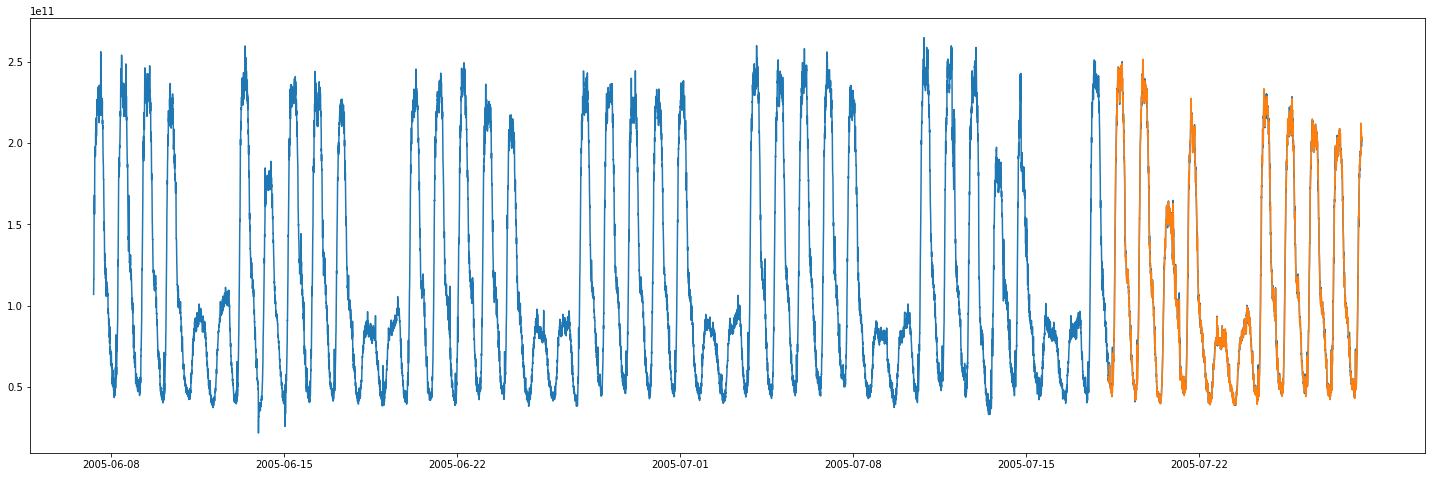

In [301]:
rcParams['figure.figsize']=25,8


plt.plot(df_a5m)
plt.plot(df_pred)
plt.show()

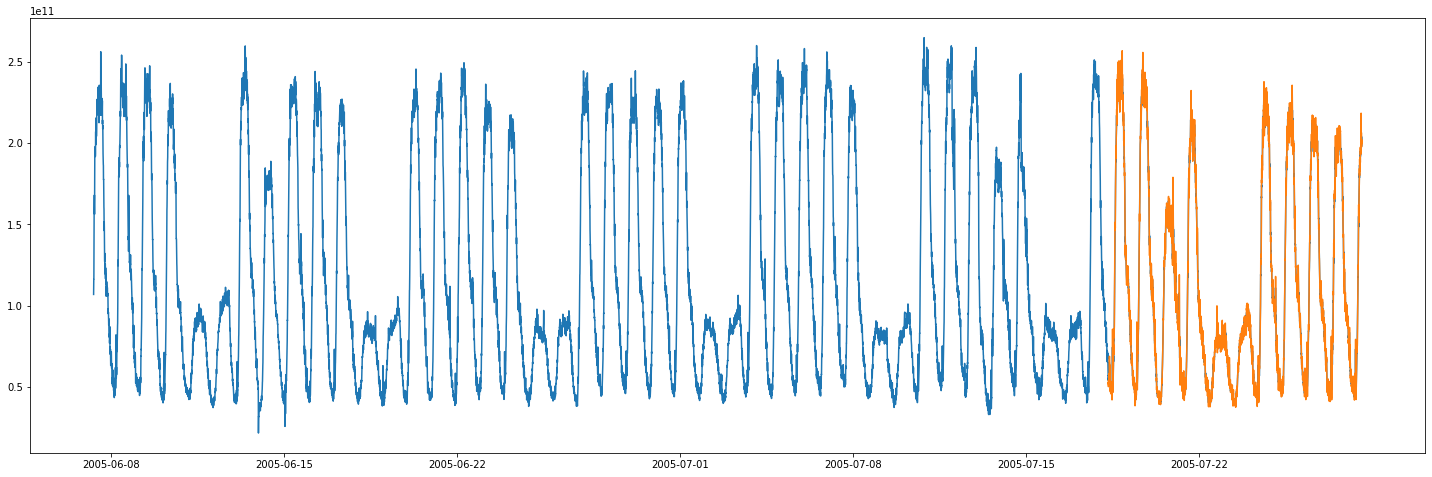

In [349]:
rcParams['figure.figsize']=25,8


plt.plot(df_a5m)
plt.plot(df_pred)
plt.show()

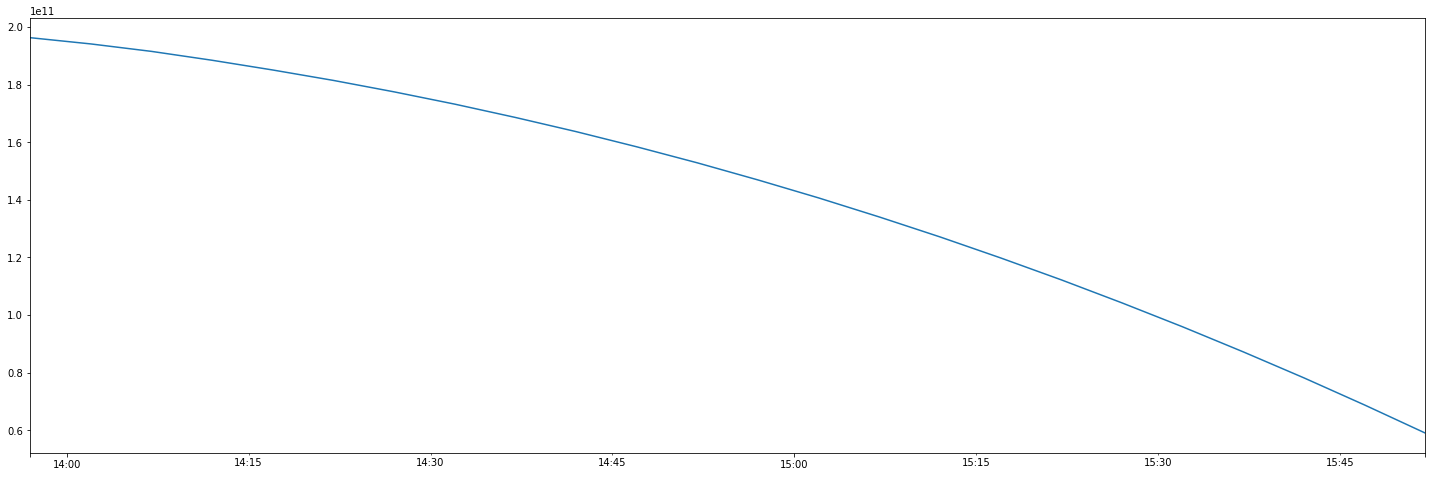

In [359]:
pred=results.get_forecast(steps=24)
pred.predicted_mean.plot()

In [ ]:
#(0,1,2)
model_a1h=SARIMAX(df_a1h,order=(0,1,2),seasonal_order=(2,2,2,24*2),enforce_stationarity=False)
results=model_a1h.fit()
results.summary()

In [361]:
df_a1h.shape[0] * 0.80

984.8000000000001

In [362]:
start = df_a1h.reset_index().iloc[985, 0]
end = df_a1h.reset_index().iloc[-1, 0]
start, end

(Timestamp('2005-07-18 07:57:00'), Timestamp('2005-07-28 12:57:00'))

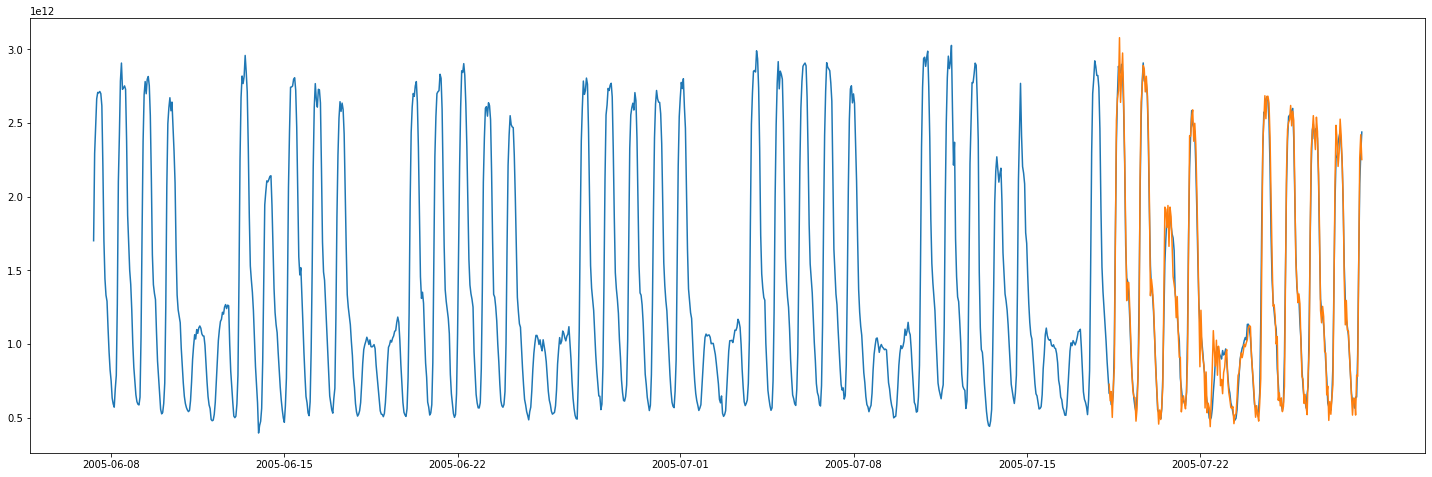

In [364]:
pred = results.predict(start=start, end=end)

df_pred = pd.DataFrame(pred, index=df_a1h.iloc[985:].index)

plt.plot(df_a1h)
plt.plot(df_pred)

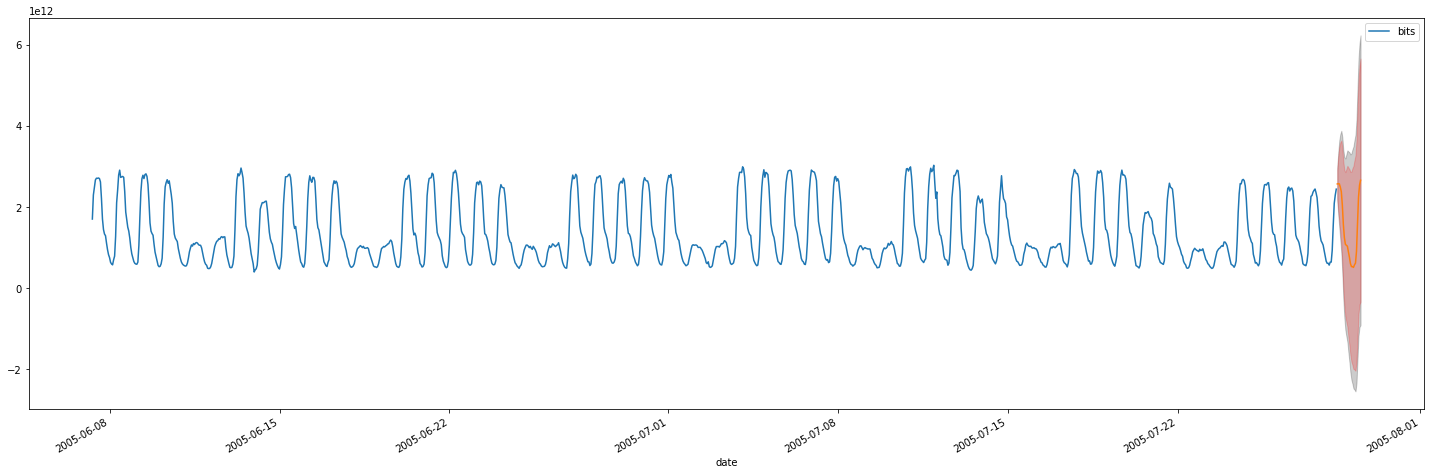

In [391]:
rcParams['figure.figsize'] = 25, 8

predic=results.get_forecast(steps=24)
pred_ic1=predic.conf_int(alpha=0.1)
pred_ic=predic.conf_int()
pepito=df_a1h.plot()
#plt.plot(df_pred)
predic.predicted_mean.plot(ax=pepito)
pepito.fill_between(pred_ic.index,pred_ic.iloc[:,0],pred_ic.iloc[:,1],alpha=0.2,color='k')
pepito.fill_between(pred_ic1.index,pred_ic1.iloc[:,0],pred_ic1.iloc[:,1],alpha=0.2,color='r')

plt.show()